In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Limitations of CARTs

CARTs have limitations- 

- A classification tree for example, is only able to produce orthogonal decision boundaries. 

- CARTs are also very sensitive to small variations in the training set. Sometimes, when a single point is removed from the training set, a CART's learned parameters may changed drastically. 

- CARTs also suffer from high variance when they are trained without constraints. In such case, they may overfit the training set. 

A solution that takes advantage of the flexibility of CARTs while reducing their tendency to memorize noise is ensemble learning.

### Ensemble Learning

Ensemble learning can be summarized as follows: 

- As a first step, the same training set is fed to different classifier models

- Each classifier learns its parameters and makes its own predictions.

- Then these predictions are fed to a meta model which aggregates them and outputs a final prediction. 

- The final prediction is more robust and less prone to errors than each individual model. 

- The best results are obtained when the models are skillful but in different ways meaning that if some models make predictions that are way off, the other models should compensate these errors. In such case, the meta-model's predictions are more robust.

####  Ensemble Learning in Practice: Voting Classifier

Let's now take a look at an ensemble technique known as the voting classifier. More concretely, we'll consider a binary classification task. 

Suppose, The ensemble here consists of N classifiers making the predictions P0,P1,to,PN with P = 0 or 1. The meta model outputs the final prediction by hard voting.

#### Majority voting(Hard Voting)

As the name implies, this majority voting technique combines the output of many classifiers using a majority voting approach. In other words, the combined prediction is the mode of the individual predictions. It is recommended to use an odd number of classifiers. For example, if we use four classifiers, the predictions for positive and negative classes could be tied. Therefore, we need at least three classifiers, and when problem constraints allow it, use five or more.

To understand majority voting, consider a voting classifier that consists of 3 trained classifiers. Suppose, classifiers 1 and 3 predict the label of 1 for a new data-point, classifier 2 predicts the label 0. In this case, 1 has 2 votes while 0 has 1 vote. As a result, the voting classifier predicts 1.

Keep in mind that Majority Voting is a technique which can only be applied to classification problems.

#### Voting Classifier in sklearn (Breast-Cancer dataset)

let's train the breast cancer dataset using scikit-learn. You'll do so using all the features in the dataset to predict whether a cell is malignant or not. 

Building a voting classifier, receiving a list of classifiers, and returning the combined model would be a cumbersome script for us to build. Luckily, scikit-learn already provides this functionality with the VotingClassifier class. 

In addition to the usual imports, import LogisticRegression, DecisionTreeClassifier and KNeighborsClassifier. You also need to 
import VotingClassifier from sklearn-dot-ensemble.

In [2]:
df = pd.read_csv("wbc.csv")

In [3]:
label = []

for i in df["diagnosis"]:
    if i == "M":
        label.append(1)
    else:
        label.append(0)

In [4]:
df["labels"] = label

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,labels
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [6]:
X = df.drop(['id', 'diagnosis','Unnamed: 32', "labels"], axis = 1)

In [7]:
y = df["labels"]
y.unique()

array([1, 0], dtype=int64)

Then, split the data into 70%-train and 30%-test 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Instantiate the different models

In [10]:
# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

In [11]:
# Instantiate individual classifiers
lr = LogisticRegression(random_state=1)
knn = KNN()
dt = DecisionTreeClassifier(random_state=1)

The main input - with keyword "estimators" - is a list of (string, estimator) tuples. Each string is a label and each estimator is a sklearn classifier. You do not have to fit the classifiers individually, as the voting classifier will take care of that for us. 

In [12]:
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
               ('K Nearest Neighbours', knn),
               ('Classification Tree', dt)]

write a for loop to iterate over the list classifiers; fit each classifier to the training set, evaluate its accuracy on the test set and print the result. 

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
# Iterate over the defined list of tuples containing the classifiers

for clf_name, clf in classifiers:
    
    #fit clf to the training set
    clf.fit(X_train, y_train)
    
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    
    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.947
K Nearest Neighbours : 0.939
Classification Tree : 0.947


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The output shows that the best classifier LogisticRegression achieves an accuracy of 95.3%.

Finally, you can instantiate a voting classifier vc by setting the estimators parameter to classifiers. 

In [15]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)

In [16]:
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier: {}'.format(accuracy_score(y_test, y_pred) * 100))

Voting Classifier: 94.73684210526315


Fitting vc to the training set yields a test set accuracy of 95.91%. This accuracy is higher than that achieved by any of the individual models in the ensemble.

### Soft Voting (Averaging)

This ensembling technique is known as averaging, or "soft" voting, and it can be applied to both classification and regression. In this technique, the combined prediction is the mean of the individual predictions. 

For Regression, we use the predicted values. And for Classification, we use the predicted probabilities. 

As the mean doesn't have ambiguous cases like the mode, we can use any number of estimators, as long as we have at least two of them.

#### Averaging ensemble with scikit-learn

To build an averaging classifier, we'll use the same class as before: VotingClassifier. The main difference is that we specify an additional parameter: voting with the value of "soft". The default value is "hard". 

We can also pass the optional parameter weights, which specifies a weight for each of the estimators. If specified, the combined prediction is a weighted average of the individual ones. Otherwise, the weights are considered uniform. 

Ideally, the weights should be tuned while training the model, for example, using grid search cross-validation.

#### Note

In a similar way, we can build an Averaging regressor. For this purpose, we use the VotingRegressor class from the sklearn dot ensemble module. The first parameter is also the list of string / estimators tuples, but instead of classifiers we use regressors.

In [18]:
# List of (string, estimator) tuples
estimators = [("lr", lr),("dt", dt), ("knn", knn)]

# Build and fit a voting classifier
clf_vote = VotingClassifier(estimators = estimators)
clf_vote.fit(X_train, y_train)

# Build and fit an averaging classifier
clf_avg = VotingClassifier(estimators = estimators, voting = "soft", weights=[3,1,2])
clf_avg.fit(X_train, y_train)

# Evaluate the performance of both models
acc_vote = accuracy_score(y_test, clf_vote.predict(X_test)) 
acc_avg = accuracy_score(y_test,  clf_avg.predict(X_test))
print('Voting: {:.2f}, Averaging: {:.2f}'.format(acc_vote * 100, acc_avg * 100))

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Voting: 94.74, Averaging: 95.61


####  "Weak" model

Voting and averaging, which you learned about in the previous lesson, work by combining the predictions of already trained models. Usually, these use a small number of estimators that are fine-tuned and individually optimized for the problem. In fact, these estimators are so well trained that, in some cases, they produce decent results on their own. We'll refer to these estimators as fine-tuned. This approach is appropriate when you already have optimized models and want to improve performance further by combining them. 

But what happens when you don't have these estimators trained beforehand? Well, that's when "weak" estimators come into play.

#### Fine-tuned vs "weak" models

You may ask yourself: what's the difference between a weak and a fine-tuned model? 

The idea of "weak" doesn't mean that it is a bad model, just that it is not as strong as a highly optimized, fine-tuned model.

#### Properties of "weak" models

A weak estimator, or model, is one which is just slightly better than random guessing. Therefore, the error rate is less than 50% but close to it. A weak model should be light in terms of space and computational requirements, and fast during training and evaluation.

One good example is a decision tree. Imagine that we fit a decision tree to the data, but instead of optimizing it completely, we limit it to a depth of two. This restricts the model to learn as much as possible, but makes sure that it has the three desired properties: 

- low performance (just above random guessing), 

- it is light (we only need two levels of decision), 

- and therefore, it is also fast for predictions.

#### Examples of "weak" models

These are some common examples of weak models. As we stated before, a decision tree constrained with small depth could be used as a weak model. 

Another example is logistic regression, which makes the assumption that the classes are linearly separable. This is not always true, in which case, logistic regression would be wrong, but potentially still useful as a weak estimator. We could also limit the number of iterations for training, or specify a high value of the parameter C to use a weak regularization. 

For regression problems, we have linear regression. Linear regression, like logistic regression, makes the assumption that the output is a linear function of the input features. Again, for this model we could limit the number of iterations or not use normalization. As we are more interested in the properties of a weak model, any other estimator which has the three desired properties can be used as well.

In [19]:
from sklearn.metrics import confusion_matrix, f1_score

In [20]:
# Build unrestricted decision tree
clf = DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=9, random_state=1)
clf.fit(X_train, y_train)

# Predict the labels
pred = clf.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, pred)
print('Confusion matrix:\n', cm)

# Print the F1 score
score = f1_score(y_test, pred)
print('F1-Score: {:.3f}'.format(score))
# Evaluate the accuracy on the test set
print('Accuracy Score : {:.3f}'.format(accuracy_score(y_test, pred)))

Confusion matrix:
 [[70  2]
 [ 3 39]]
F1-Score: 0.940
Accuracy Score : 0.956


In [21]:
# Build restricted decision tree
clf = DecisionTreeClassifier(max_depth=4, max_features=2, random_state=1)
clf.fit(X_train, y_train)

# Predict the labels
pred = clf.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, pred)
print('Confusion matrix:\n', cm)

# Print the F1 score
score = f1_score(y_test, pred)
print('F1-Score: {:.3f}'.format(score))
# Evaluate the accuracy on the test set
print('Accuracy Score : {:.3f}'.format(accuracy_score(y_test, pred)))

Confusion matrix:
 [[71  1]
 [ 6 36]]
F1-Score: 0.911
Accuracy Score : 0.939


Notice how the restricted decision tree performs worse than unrestricted, and is better than random guessing.

#### Heterogeneous vs Homogeneous Ensembles

Until now, you've only seen heterogeneous ensemble methods, which use different types of fine-tuned algorithms. Therefore, they tend to work well with a small number of estimators. For example, we could combine a decision tree, a logistic regression, and a support vector machine using voting to improve the results. Here are included Voting, Averaging, and Stacking. 

Homogeneous ensemble methods such as bagging, on the other hand, work by applying the same algorithm on all the estimators, and this algorithm must be a "weak" model. In practice, we end up working with a large number of "weak" estimators in order to have better performance than that of a single model. Bagging and Boosting are some of the most popular of this kind.

The requirements for Homogeneous ensemble methods are the following: 

- First, all the models must be independent. 

- Secondly, each model performs better than random guessing. 

- And finally, all individual models have similar performance. 

If these three conditions are met, then adding more models increases the probability of the ensemble to be correct, and makes this probability tend to 1, equivalent to 100%! The second and third requirements can be fulfilled by using the same "weak" model for all the estimators, as then all will have a similar performance and be better than random guessing.

### Bagging Classifier

We know that, The Voting Classifier is an ensemble of models that are fit to the same training set using different algorithms. You also saw that the final predictions were obtained by majority voting. 

In Bagging, the ensemble is formed by models that use the same training algorithm. However, these models are not trained on the entire training set. Instead, each model is trained on a different subset of the data.

#### Bagging

In fact, bagging stands for bootstrap aggregation. Its name refers to the fact that it uses a technique known as the bootstrap. Overall, Bagging has the effect of reducing the variance of individual models in the ensemble.

#### Bootstrap

Let's first try to understand what the bootstrap method is. Consider the case where you have 3 balls labeled A, B, and C. A bootstrap sample is a sample drawn from this with replacement. By replacement, we mean that any ball can be drawn many times. 

For example, in the first bootstrap B can be drawn 3 times in a row. In the second bootstrap sample, A can be drawn two times while B can be drawn once, and so on. 

But how bootstraping can help us produce an ensemble?

In the training phase, bagging consists of drawing N different bootstrap samples from the training set. Each of these bootstrap samples are then used to train N models that use the same algorithm .

When a new instance is fed to the different models forming the bagging ensemble, each model outputs its prediction. The meta model collects these predictions and outputs a final prediction depending on the nature of the problem.

#### Pros and cons of bagging

Why is bagging a useful technique? 

- First, it helps reduce variance, as the sampling is truly random. 

- Bias can also be reduced since we use voting or averaging to combine the models. 

- Because of the high number of estimators used, bagging provides stability and robustness. 

- Cons : However, Bagging is computationally expensive in terms of space and time.


#### Training with bootstrapping

Let's now build a "weak" decision tree classifier and train it on a sample of the training set drawn with replacement. This will help you understand what happens on every iteration of a bagging ensemble.

In [22]:
def build_decision_tree(X_train, y_train, num_dt, random_state=None):
    
    # Build the list of individual models
    weak_dt_list = []
    for i in range(num_dt):
        # Takes a sample with replacement,
        X_train_sample = X_train.sample(frac=1.0, replace=True, random_state=i)
        y_train_sample = y_train.loc[X_train_sample.index]

        # Build a "weak" Decision Tree classifier
        clf = DecisionTreeClassifier(random_state = i)
        # Fit the model to the training sample
        weak_dt_list.append(clf.fit(X_train_sample, y_train_sample))
    
    return weak_dt_list
    

def predict_voting(weak_estimators, X_train, y_train, X_test):
    
    estimators = []
    
    for j in weak_estimators:
        estimators.append(("DT {}".format(weak_estimators.index(j)), j))
    

    clf_vote = VotingClassifier(estimators = estimators)
    clf_vote.fit(X_train, y_train)
    prediction = clf_vote.predict(X_test)
    
    return prediction

In [23]:
### For 20 weak classifiers
weak_classifiers = build_decision_tree(X_train, y_train, 300, random_state=None)

# Predict on the test set
pred = predict_voting(weak_classifiers,X_train, y_train, X_test)

# Print the F1 score
print('F1 score: {:.3f}'.format(f1_score(y_test, pred)))

# Evaluate the accuracy on the test set
print('Accuracy Score : {:.3f}'.format(accuracy_score(y_test, pred)))

F1 score: 0.914
Accuracy Score : 0.939


#### Bagging: Classification & Regression

In classification, the final prediction is obtained by majority voting. The corresponding classifier in scikit-learn is BaggingClassifier. In regression, the final prediction is the average of the predictions made by the individual models forming the ensemble. The corresponding regressor in scikit-learn is BaggingRegressor.


#### Bagging Classifier in sklearn (Breast-Cancer dataset)

Great! Now that you understand how Bagging works, let's train a BaggingClassifier in scikit-learn on the breast cancer dataset. Note that the dataset is already loaded. 

First import BaggingClassifier, DecisionTreeClassifier, accuracy_score and train_test_split and then split the data into 70%-train and 30%-test.

In [24]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Now, instantiate a classification tree dt. You can then instantiate a BaggingClassifier bc that consists of 300 classification trees dt. This can be done by setting the parameters base_estimator to dt and n_estimators to 300. In addition, set the paramter n_jobs to -1 so that all CPU cores are used in computation. 

In [25]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(random_state=1, max_depth = 2) ## Weak estimator
# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)

In [26]:
# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

In [27]:
# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy * 100))

Accuracy of Bagging Classifier: 94.737


The output shows that a BaggingClassifier achieves a test set accuracy of 95.9%. Training the classification tree dt, which is the base estimator here, to the same training set would lead to a test set accuracy of 93%(see initial dt classifier result). The result highlights how bagging outperforms the base estimator dt.

#### Out Of Bag Evaluation

Recall that in bagging, some instances may be sampled several times for one model. On the other hand, other instance may not be sampled at all.On average, for each model, 63% of the training instances are sampled. The remaining 37% that are not sampled constitute what is known as the Out-of-bag or OOB instances. 

Since OOB instances are not seen by a model during training, these can be used to estimate the performance of the ensemble without the need for cross-validation. This technique is known as OOB-evaluation.

Alright! Now it's time to see OOB-evaluation in action. Again, we'll be classifying cancerous cells as malignant or benign from the breast cancer dataset which is already loaded. After importing BaggingClassifier, DecisionTreeClassifier, accuracy_score and train_test_split, split the dataset into 70%-train and 30%-test.

Importantly, set the parameter oob_score to True in order to evaluate the OOB-accuracy of bc after training. 

Note that in scikit-learn, the OOB-score corresponds to the accuracy for classifiers and the r-squared score for regressors.

In [28]:
# Instantiate a BaggingClassifier 'bc'; set oob_score = True
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1)

In [29]:
# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict the test set labels
y_pred = bc.predict(X_test)

evaluate the OOB-accuracy of bc by extracting the attribute oob_score_ from the trained instance; assign the result to oob_accuracy and print out the results. 

In [30]:
# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_

In [31]:
# Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))

# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

Test set accuracy: 0.947
OOB accuracy: 0.949


The test-set accuracy is about 95.9% and the OOB-accuracy is about 95.2%. The two obtained accuracies are pretty close though not exactly equal. These results highlight how OOB-evaluation can be an efficient technique to obtain a performance estimate of a bagged-ensemble on unseen data without performing cross-validation.

#### Basic parameters for bagging

Let's review some of the parameters of bagging ensemble models you've already seen. 

- One of the most important parameters is `base_estimator`, the "weak" model which will be built for each sample. 

- The `n_estimators` parameter specifies the number of estimators to use. This is ten by default, but in practice we'll use more, and the larger the better. Usually between 100 and 500 trees are enough.

- You also learned how to calculate the out-of-bag score by specifying the parameter `oob_score` as True.

#### Additional parameters for bagging

Let's take a look at some additional parameters you can use to further improve your bagging models. 

- First we have `max_samples`, which specifies the number of instances to draw for each estimator. The default is 1.0, equivalent to 100%. 


- Another important parameter is `max_features`. This is the number of features to draw randomly for each estimator. It is also 1.0 by default. Using lower values provides more diversity for the individual models and reduces the correlation among them, as each will get a different sample of both features and instances. 

       a. For classification, the optimal value lies around the square root of the number of features.  

       b. For regression, the optimal value is usually close to one third of the number of features. 


- There's also the parameter `bootstrap`, which is a boolean to indicate whether samples are drawn with replacement. The default is True, as that is the nature of Bagging. 

      a. If passed as True, then it is recommended to use max_samples as 100%. 

      b. If False, then max_samples should be lower than 100%, because otherwise all the samples would be identical.

In [32]:
# Build a balanced logistic regression
clf_base = LogisticRegression(max_iter = 5000, class_weight='balanced', random_state=1)

# Build and fit a bagging classifier with custom parameters
clf_bag = BaggingClassifier(base_estimator = clf_base, n_estimators = 50, max_features=10, max_samples = 0.65, 
                            bootstrap= True,  random_state=1)
clf_bag.fit(X_train, y_train)

# Calculate predictions and evaluate the accuracy on the test set
y_pred = clf_bag.predict(X_test)

In [33]:
print('Accuracy:  {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy:  0.93


### Random forest

Recall that in bagging the base estimator could be any model including a decision tree, logistic regression or even a neural network. Each estimator is trained on a distinct bootstrap sample drawn from the training set using all available features.

Random Forests is an ensemble method that uses a decision tree as a base estimator. In Random Forests, each estimator is trained on a different bootstrap sample having the same size as the training set. 

Random forests introduces further randomization than bagging when training each of the base estimators. When each tree is trained, only d features can be sampled at each node without replacement, where d is a number smaller than the total number of features. 

In scikit-learn d defaults to the square-root of the number of features. For example, if there are 100 features, only 10 features are sampled at each node.

#### Random Forests: Prediction

For classification, the final prediction is made by majority voting. The corresponding scikit-learn class is RandomForestClassifier. 

For regression, the final prediction is the average of all the labels predicted by the base estimators. The corresponding scikit-learn class is RandomForestRegressor. 

These classes are also part of the sklearn dot ensemble module. In general, Random Forests achieves a lower variance than individual trees.


Let's look at some of the most important parameters. 

- First we have the parameters shared with Bagging: n_estimators, max_features, and oob_score. 

- And then we have the tree-specific parameters: the maximum depth, the minimum number of samples required to split a node, the minimum number of samples required in a leaf node, and class weight. 

Class weight is a useful parameter which allows you to specify the weights for each class using a dictionary. Or we can pass it as the string value "balanced" and the model will use the class distribution to calculate balanced weights. Therefore, random forests are able to deal with imbalanced targets.

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=1)

In [35]:
clf_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [36]:
rf_pred = clf_rf.predict(X_test)

In [37]:
print('Accuracy:  {:.3f}'.format(accuracy_score(y_test, rf_pred)))

Accuracy:  0.956


#### Feature Importance

When a tree based method is trained, the predictive power of a feature or its importance can be assessed. 

In scikit-learn, feature importance is assessed by measuring how much the tree nodes use a particular feature to reduce impurity. 

Note that the importance of a feature is expressed as a percentage indicating the weight of that feature in training and prediction. Once you train a tree-based model in scikit-learn, the features importances can be accessed by extracting the feature_importance_ attribute from the model.

In [38]:
clf_rf.feature_importances_

array([0.06811959, 0.01895654, 0.06651358, 0.04562212, 0.00559711,
       0.0050085 , 0.05854792, 0.09173071, 0.00249771, 0.00226877,
       0.02215035, 0.0035935 , 0.00779888, 0.0288948 , 0.00429829,
       0.00313988, 0.00286557, 0.00498554, 0.00458959, 0.00526312,
       0.08431373, 0.01757519, 0.13077297, 0.11767767, 0.00914248,
       0.01092473, 0.03087749, 0.13030665, 0.00923893, 0.00672809])

#### Feature Importance in sklearn

To visualize the importance of features as assessed by rf, you can create a pandas series of the features importances as shown here and then sort this series and make a horiztonal-barplot.

In [39]:
# Create a pd.Series of features importances
importances_rf = pd.Series(clf_rf.feature_importances_, index = X.columns)
#importances_rf

In [40]:
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
#sorted_importances_rf

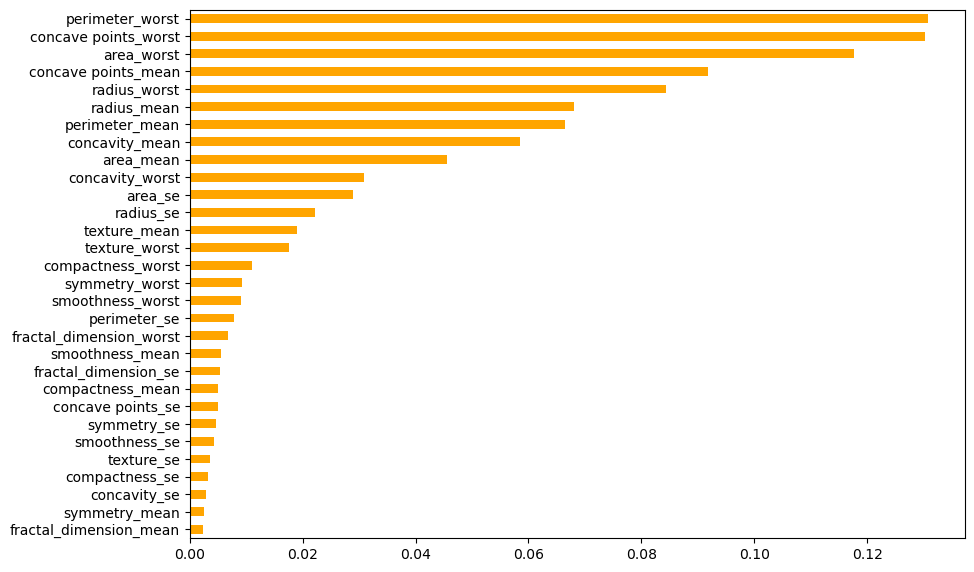

In [41]:
# Make a horizontal bar plot
plt.figure(figsize=(10,7),dpi=100)

sorted_importances_rf.plot(kind='barh', color='orange'); 

plt.show()

#### Grid search CV in sklearn (Breast Cancer dataset)

Let's now tune rf on the wisconsin breast cancer dataset which is already loaded and split into 80%-train and 20%-test. First, import GridSearchCV from sklearn-dot-model_selection. 

In [42]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [43]:
# Define the grid of hyperparameters 'params_dt'
params_rf = {'n_estimators': [20,25,27,30], 'max_depth': [2,3,4,6,7,8,9],'max_features': ['log2', 'sqrt']}

In [44]:
# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_rf = GridSearchCV(estimator=clf_rf, param_grid=params_rf, scoring='accuracy', cv=5, n_jobs=-1)

In [45]:
# Fit 'grid_dt' to the training data
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 6, 7, 8, 9],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [20, 25, 27, 30]},
             scoring='accuracy')

In [46]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 6, 'max_features': 'log2', 'n_estimators': 25}


In [47]:
# Extract best CV score from 'grid_dt'
best_CV_score = grid_rf.best_score_
print('Best CV accuracy'.format(best_CV_score))

Best CV accuracy


In [48]:
best_CV_score

0.956043956043956

In [49]:
# Extract best model from 'grid_dt'
best_model = grid_rf.best_estimator_

In [50]:
# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)

In [51]:
# Evaluate the accuracy on the test set 0f untuned DT
print('Accuracy Score of Untuned RF : {:.3f}'.format(accuracy_score(y_test, rf_pred)*100))

# Print test set accuracy of tuned DT
print("Accuracy Score of Tuned RF: {:.3f}".format(test_acc*100))

Accuracy Score of Untuned RF : 95.614
Accuracy Score of Tuned RF: 96.491
